In [5]:
import numpy as np
import matplotlib.pyplot as plt

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

Amplificador inversor

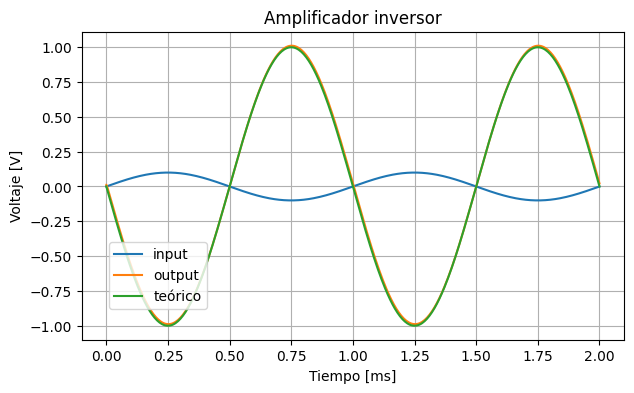

In [6]:
# Amplificador inversor
circuit = Circuit('Amplificador inversor')

# Se incluye el amplificador LM741
circuit.include("lm741.lib")

# Se definen los valores de las resistencias
R1=0.5
R2=5
R3=1/((1/R1)+(1/R2))

# Se definen los elementos
source = circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=0.1@u_V, frequency=1@u_kHz)
circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
circuit.X(1, 'lm741', 'b', 'a', '+Vcc', '-Vcc', 'output')
circuit.R(1, 'input', 'a', R1@u_kΩ)
circuit.R(2, 'a', 'output', R2@u_kΩ)
circuit.R(3, 'b', circuit.gnd, R3@u_kΩ)

# Se simula y analiza el circuito
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

# Función teórica
time=np.array(analysis.time*1000)
v_s=-analysis['input']*(R2/R1)

# Gráfica
figure, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.set_title('Amplificador inversor')
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('Voltaje [V]')
ax.grid()
ax.plot(analysis.time*1000, analysis['input'])
ax.plot(analysis.time*1000, analysis['output'])
ax.plot(time, v_s)
ax.legend(('input', 'output', 'teórico'), loc=(.05,.1))

Amplificador no inversor

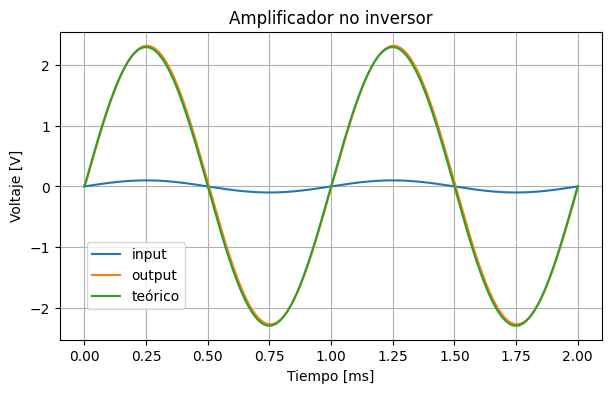

In [7]:
# Amplificador no inversor
circuit = Circuit('Amplificador no inversor')

# Se incluye el amplificador LM741
circuit.include("lm741.lib")

# Se definen los valores de las resistencias
R1=1
R2=22
R3=1/((1/R1)+(1/R2))

# Se definen los elementos
source = circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=0.1@u_V, frequency=1@u_kHz)
circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
circuit.X(1, 'lm741', 'b', 'a', '+Vcc', '-Vcc', 'output')
circuit.R(1, circuit.gnd, 'a', R1@u_kΩ)
circuit.R(2, 'a', 'output', R2@u_kΩ)
circuit.R(3, 'input', 'b', R3@u_kΩ)

# Se simula y analiza el circuito
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

# Función teórica
time=np.array(analysis.time*1000)
v_s=analysis['input']*(1+R2/R1)

# Gráfica
figure, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.set_title('Amplificador no inversor')
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('Voltaje [V]')
ax.grid()
ax.plot(analysis.time*1000, analysis['input'])
ax.plot(analysis.time*1000, analysis['output'])
ax.plot(time, v_s)
ax.legend(('input', 'output', 'teórico'), loc=(.05,.1))

Amplificador comparador

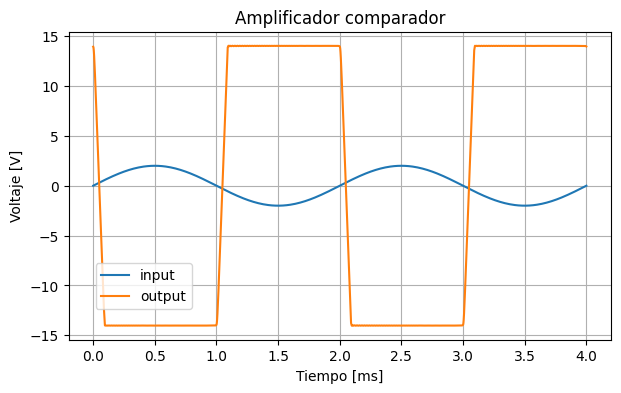

In [8]:
# Amplificador comparador inversor
circuit = Circuit('Amplificador comparador inversor')

# Se incluye el amplificador LM741
circuit.include("lm741.lib")

# Se define el valor de la resistencia
R1=10

# Se definen los elementos
source = circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=2@u_V, frequency=0.5@u_kHz)
circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
circuit.X(1, 'lm741', circuit.gnd, 'a', '+Vcc', '-Vcc', 'output')
circuit.R(1, 'input', 'a', R1@u_kΩ)

# Se simula y analiza el circuito
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

# Gráfica
figure, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.set_title('Amplificador comparador')
ax.set_xlabel('Tiempo [ms]')
ax.set_ylabel('Voltaje [V]')
ax.grid()
ax.plot(analysis.time*1000, analysis['input'])
ax.plot(analysis.time*1000, analysis['output'])
ax.legend(('input', 'output'), loc=(.05,.1))